<a href="https://colab.research.google.com/github/HollowDena/mahina/blob/main/dp22055_2md.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autors: *Deniss Petrovs, dp22055*
===========================

#1. Moduļu importēšana

In [72]:
# Importē nepieciešamos moduļus
# Papildiniet pēc nepieciešamības
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import zipfile
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
current_directory = os.getcwd()
print("Current directory:", current_directory)

Current directory: /content


In [27]:
folder1_path_train = "/content/drive/My Drive/pirksti/rokas_train"
folder2_path_validate = "/content/drive/My Drive/pirksti/rokas_validate"

In [3]:
zip_file_path_train = "/content/drive/My Drive/1a_Ii10oWdrmMyEgalvYz1Y3HS0yfRlOG?usp=drive_link"
zip_file_path_validate = "/content/drive/My Drive/1hYc9gh5ZM9g1EGRZIMZG-xGalS5WYyhp?usp=drive_link"

In [99]:
filenames = os.listdir(folder1_path_train)
filenames2 = os.listdir(folder2_path_validate)

In [100]:
filenames2

['1_151.jpg',
 '1_152.jpg',
 '1_153.jpg',
 '1_154.jpg',
 '1_155.jpg',
 '1_156.jpg',
 '1_160.jpg',
 '1_158.jpg',
 '1_157.jpg',
 '1_159.jpg',
 '2_149.jpg',
 '2_150.jpg',
 '2_151.jpg',
 '2_153.jpg',
 '2_154.jpg',
 '2_155.jpg',
 '2_157.jpg',
 '2_156.jpg',
 '2_158.jpg',
 '3_155.jpg',
 '3_156.jpg',
 '3_154.jpg',
 '3_157.jpg',
 '3_159.jpg',
 '3_158.jpg',
 '3_161.jpg',
 '3_162.jpg',
 '3_163.jpg',
 '4_147.jpg',
 '4_149.jpg',
 '4_148.jpg',
 '4_151.jpg',
 '4_150.jpg',
 '4_152.jpg',
 '4_153.jpg',
 '4_154.jpg',
 '4_155.jpg',
 '5_143.jpg',
 '4_156.jpg',
 '5_144.jpg',
 '5_145.jpg',
 '5_147.jpg',
 '2_152.jpg',
 '5_146.jpg',
 '5_149.jpg',
 '5_148.jpg',
 '5_150.jpg',
 '5_151.jpg',
 '5_152.jpg',
 '3_160.jpg']

In [ ]:
count1_train = 0
count2_train = 0
count3_train = 0
count4_train = 0
count5_train = 0

count1_validate = 0
count2_validate = 0
count3_validate = 0
count4_validate = 0
count5_validate = 0

for filename in filenames:
  if(filename[0]=='1'):
    count1_train+=1
  if(filename[0]=='2'):
    count2_train+=1
  if(filename[0]=='3'):
    count3_train+=1
  if(filename[0]=='4'):
    count4_train+=1
  if(filename[0]=='5'):
    count5_train+=1

for filename in filenames2:
  if(filename[0]=='1'):
    count1_validate+=1
  if(filename[0]=='2'):
    count2_validate+=1
  if(filename[0]=='3'):
    count3_validate+=1
  if(filename[0]=='4'):
    count4_validate+=1
  if(filename[0]=='5'):
    count5_validate+=1
print(f"Testa datu statistika: ")
print(f"Ir", count1_train, "1-pirkstu bildes")
print(f"Ir", count2_train, "2-pirkstu bildes")
print(f"Ir", count3_train, "3-pirkstu bildes")
print(f"Ir", count4_train, "4-pirkstu bildes")
print(f"Ir", count5_train, "5-pirkstu bildes")

print(f"Validācijas datu statistika: ")
print(f"Ir", count1_validate, "1-pirkstu bildes")
print(f"Ir", count2_validate, "2-pirkstu bildes")
print(f"Ir", count3_validate, "3-pirkstu bildes")
print(f"Ir", count4_validate, "4-pirkstu bildes")
print(f"Ir", count5_validate, "5-pirkstu bildes")

In [ ]:
random_element = random.choice(filenames)
image = Image.open(folder1_path_train+"/"+random_element)
image

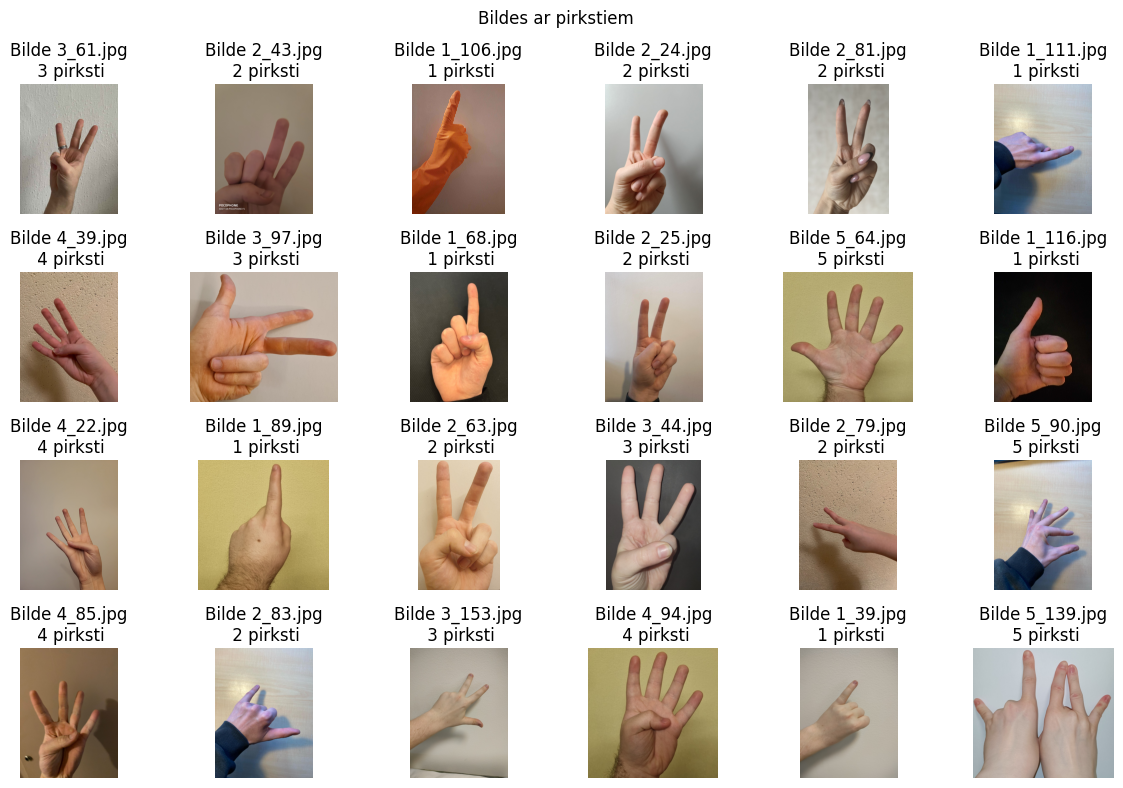

In [83]:
#Izdrukā nejauši izvēlētas bildes no lielās apmācību kopas
rindas = 3
kolonnas = 5
fig, asis = plt.subplots(rindas, kolonnas, figsize=(12,8))
fig.suptitle('Bildes ar pirkstiem')
for i in range(rindas):
    for j in range(kolonnas):
        random_element = random.choice(filenames)
        image = Image.open(folder1_path_train+"/"+random_element)
        asis[i, j].imshow(image) # protams var katrā rādīt citu bildi, nevis šo vienīgo
        asis[i, j].set_title(f'Bilde {random_element}\n {random_element[0]} pirksti')
        asis[i, j].axis('off') # nerādam x/y asis kā grafikiem

plt.tight_layout()
plt.show()

In [114]:
files_dict = {str(i): [] for i in range(1, 6)}#Sadalam apmācības datus pēc pirkstu skaita

for filename in filenames:
    first_char = filename[0]
    if first_char in files_dict:
        files_dict[first_char].append(filename)

files_starting_with_1_train = files_dict['1']
files_starting_with_2_train = files_dict['2']
files_starting_with_3_train = files_dict['3']
files_starting_with_4_train = files_dict['4']
files_starting_with_5_train = files_dict['5']

files_train_lists = [
    files_starting_with_1_train,
    files_starting_with_2_train,
    files_starting_with_3_train,
    files_starting_with_4_train,
    files_starting_with_5_train
]

In [179]:
files_dict2 = {str(j): [] for j in range(1, 6)}#Sadalam validācijas datus pēc pirkstu skaita

for filename2 in filenames2:
    first_char = filename2[0]
    if first_char in files_dict:
        files_dict2[first_char].append(filename2)

files_starting_with_1_validate = files_dict2['1']
files_starting_with_2_validate = files_dict2['2']
files_starting_with_3_validate = files_dict2['3']
files_starting_with_4_validate = files_dict2['4']
files_starting_with_5_validate = files_dict2['5']

files_validate_lists = [
     files_starting_with_1_validate,
     files_starting_with_2_validate,
     files_starting_with_3_validate,
     files_starting_with_4_validate,
     files_starting_with_5_validate
]

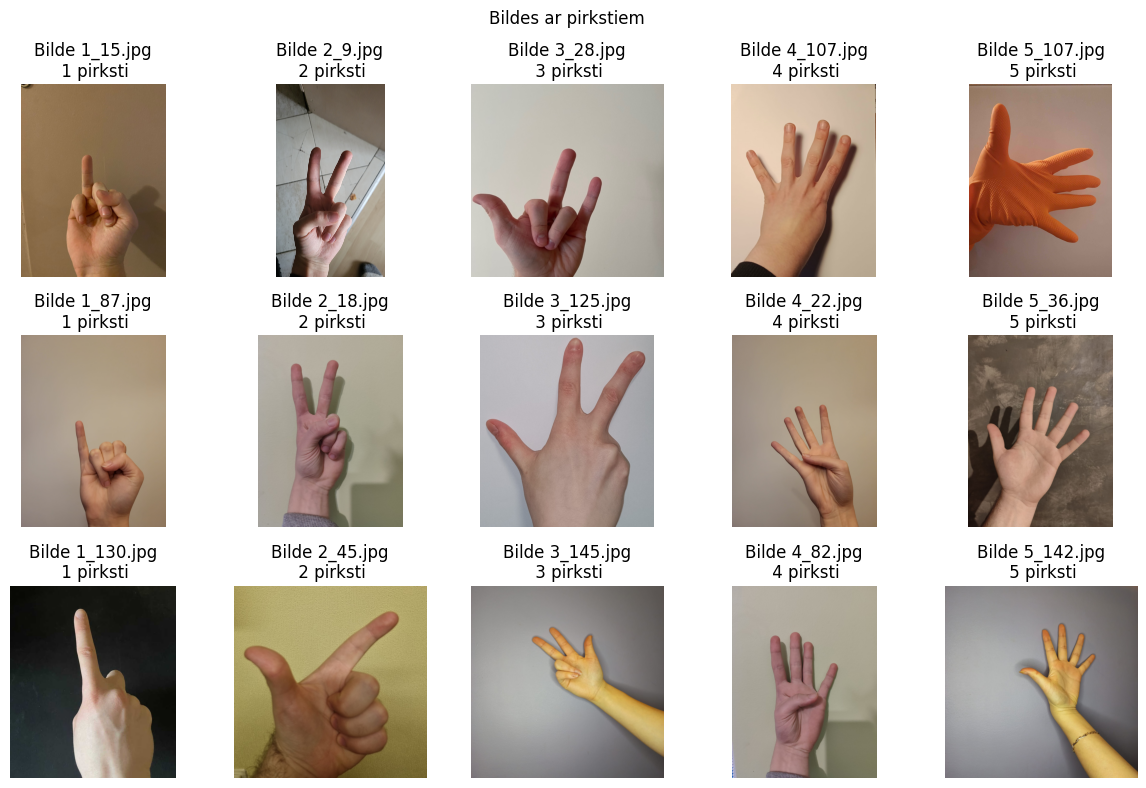

In [115]:
rindas = 3
kolonnas = 5
fig, asis = plt.subplots(rindas, kolonnas, figsize=(12,8))
fig.suptitle('Bildes ar pirkstiem')
for i in range(rindas):
    for j in range(kolonnas):
        random_element = random.choice(files_train_lists[j])
        image = Image.open(folder1_path_train+"/"+random_element)
        asis[i, j].imshow(image)
        asis[i, j].set_title(f'Bilde {random_element}\n {random_element[0]} pirksti')
        asis[i, j].axis('off')

plt.tight_layout()
plt.show()

#3. Datu sagatavošana

In [ ]:
#Tā kā modelis nav jāapmāca uz bildes, pagaidām tiek veidots tenzors no nosaukuma


In [148]:
#Izveidojam tenzoru ar visiem 1-pirkstu bilžu nosaukumiem


tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.])

#4. Neironu tīkla definēšana

In [235]:
# Definē neironu tīklu
torch.manual_seed(69)
class Model(nn.Module):

  def __init__(self, cnt=10, neur1=30, neur2=64, finger=5):
      super().__init__()
      self.lay1 = nn.Linear(cnt, neur1)
      self.lay2 = nn.Linear(neur1, neur2)
      self.izv = nn.Linear(neur2, finger)
  def forward(self, x):
      x = F.relu(self.lay1(x))
      x = F.relu(self.lay2(x))
      x = self.izv(x)
      return x

In [236]:
model = Model()

In [ ]:
filenames2

In [198]:
train_data = []
for filename in filenames2:
  train_data_int = int(filename[0])
  train_data.append(float(train_data_int))
X_test = torch.FloatTensor(train_data)
X_test

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 5., 4., 5., 5., 5., 2., 5., 5., 5., 5., 5., 5., 3.])

In [247]:
test_list =[]
for filename in filenames2:
  X = filename.ljust(10)[:10]
  X = map(ord, X)
  X = map(float, X)
  X = list(X)
  X = torch.Tensor(X)
  test_list.append(X)

In [ ]:
test_list

In [199]:
X_test = X_test.unsqueeze(1)


In [250]:
with torch.no_grad():
  for test in test_list:
    y_eval = model.forward(test)


In [251]:
y_eval

tensor([-5.4450,  5.0004, -1.1405,  4.0753, -0.8776])

<ipython-input-214-0f919525d82c>:31: UserWarning: Glyph 27 () missing from current font.
  plt.tight_layout()


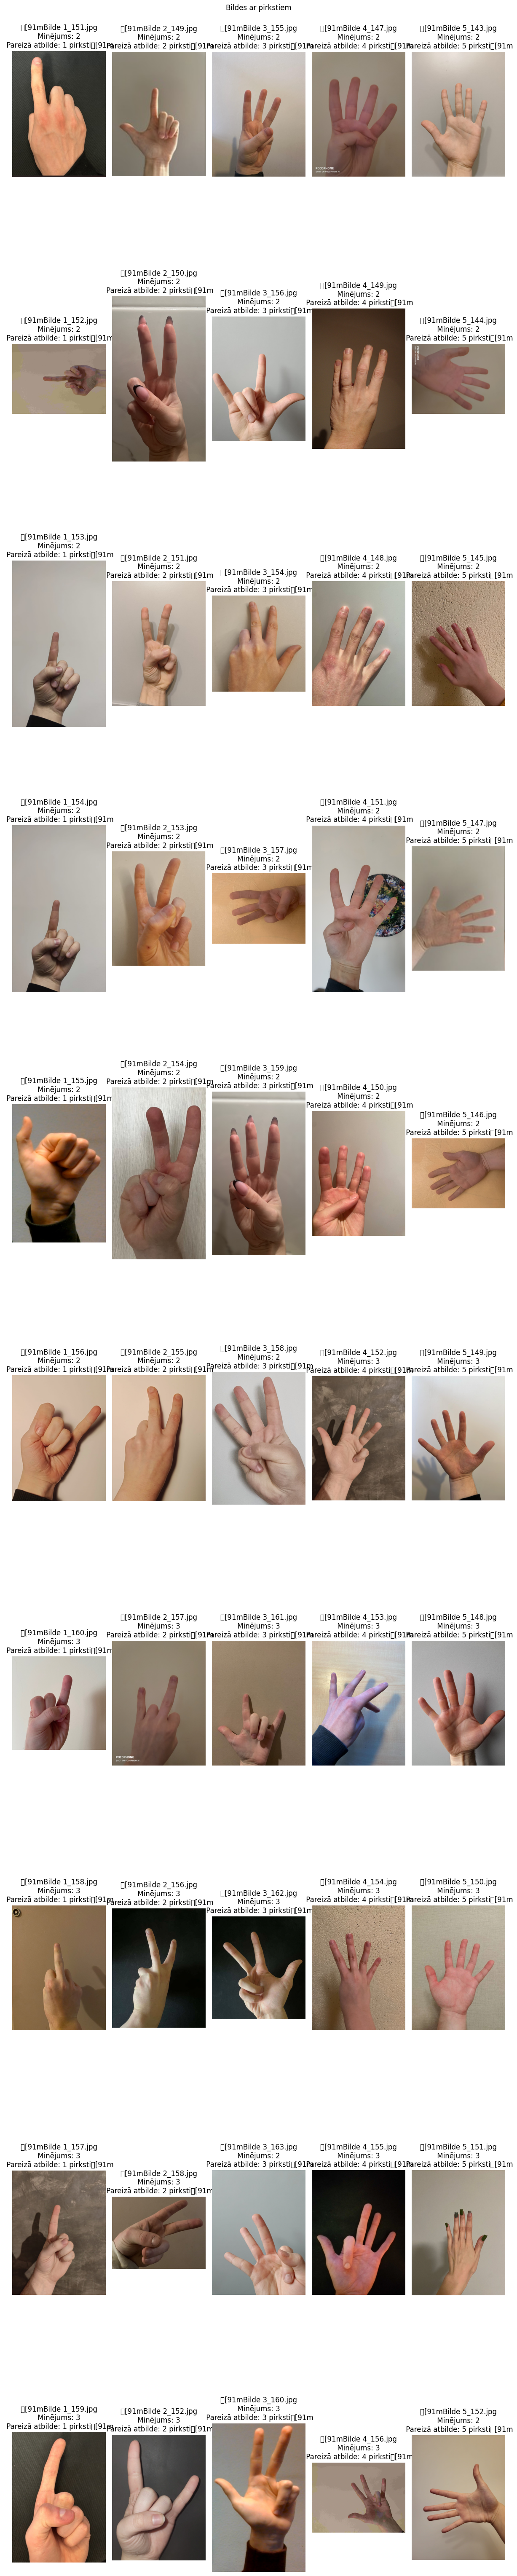

In [214]:
rindas = 10
kolonnas = 5
fig, asis = plt.subplots(rindas, kolonnas, figsize=(12,64))
fig.suptitle('Bildes ar pirkstiem')
for i in range(rindas):
    for j in range(kolonnas):
        data = train_data[i * kolonnas + j]
        #print(i * kolonnas + j)
        count = files_validate_lists[j]
        finger = count[i]
        y_val = model.forward(data)
        #print(f"Šis y_val: ", y_val, "šis ir argmax: ", y_val.argmax())
        if y_val.argmax() == 0:
          z = "1"
        if y_val.argmax() == 1:
         z = "2"
        if y_val.argmax() == 2:
          z = "3"
        if y_val.argmax() == 3:
          z = "3"
        if y_val.argmax() == 4:
          z = "3"
        image = Image.open(folder2_path_validate+"/"+finger)
        asis[i, j].imshow(image)
        if(int(finger[0])!=z):
          asis[i, j].set_title('\033[91m' + f'Bilde {finger}\n Minējums: {z} \n Pareizā atbilde: {finger[0]} pirksti'+'\033[91m')
        else:
          asis[i, j].set_title(f'Bilde {finger}\n Minējums: {z} \n Pareizā atbilde: {finger[0]} pirksti')
        asis[i, j].axis('off')

plt.tight_layout()
plt.show()

#5. Neironu tīkla apmācīšana

In [ ]:
# Apmāca neironu tīklu klasificēt īrisus pēc to ziedu raksturlielumiem

# * jūsu kods šeit *

# 6. Neironu tīkla pārbaudīšana.
Jāizdrukā visu pārbaužu rezultāti viegli saprotamā formā (12 rindiņas, pa vienai katram validācijas kopas piemēram), kā arī kopējais precizitātes novērtējums.  
 Noformējuma piemērs:  
 1. rindiņa: klasifikatora rezultāts: Iris-setosa; reālā suga: Iris-setosa, pareizi  
 ...
 12. rindiņa: klasifikatora rezultāts: Iris-versicolor; reālā suga: Iris-virginica, nepareizi  
 Precizitāte: 58% (7/12)

In [ ]:
# Pārbauda neirona tīkla precizītāti ar validācijas datu kopu

# * jūsu kods šeit *
